In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from scipy.optimize import minimize
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
import datetime as dt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
import random

In [2]:
from sklearn.metrics import mean_absolute_percentage_error

# DailyDelhiClimate

 This dataset provides data from 1st January 2013 to 24th April 2017 in the city of Delhi, India. The 4 parameters here are
meantemp, humidity, wind_speed, meanpressure.

In [3]:
df_train = pd.read_csv('DailyDelhiClimateTrain.csv')

In [4]:
df_test = pd.read_csv('DailyDelhiClimateTest.csv')

In [5]:
df_test

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [6]:
df_train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [7]:
df_train['date'] = pd.to_datetime(df_train['date'])

# Set the 'Date' column as the index
df_train.set_index('date', inplace=True)

# Group by week and calculate the mean for numerical columns
weekly_data_train = df_train.groupby(pd.Grouper(freq='W')).mean()

# Reset index for a cleaner DataFrame (optional)
weekly_data_train.reset_index(inplace=True)

# Print the resulting DataFrame
print(weekly_data_train)

          date   meantemp   humidity  wind_speed  meanpressure
0   2013-01-06   7.705556  84.077778    2.337778   1017.300000
1   2013-01-13  12.343537  65.145238    8.825170   1016.632653
2   2013-01-20  13.642857  81.663265    4.242857   1017.139456
3   2013-01-27  12.329592  67.748299    4.770544   1020.337075
4   2013-02-03  15.736905  67.667347    2.337194   1017.020578
..         ...        ...        ...         ...           ...
204 2016-12-04  20.428841  62.631290    4.839643    873.901783
205 2016-12-11  18.318229  70.672236    3.075850   1015.619483
206 2016-12-18  17.871140  61.808297    5.955406   1016.727185
207 2016-12-25  17.123006  66.346011    9.636147   1014.901237
208 2017-01-01  15.085173  82.139204    5.751243   1016.661017

[209 rows x 5 columns]


In [8]:
df_test['date'] = pd.to_datetime(df_test['date'])

# Set the 'Date' column as the index
df_test.set_index('date', inplace=True)

# Group by week and calculate the mean for numerical columns
weekly_data_test = df_test.groupby(pd.Grouper(freq='W')).mean()

# Reset index for a cleaner DataFrame (optional)
weekly_data_test.reset_index(inplace=True)

# Print the resulting DataFrame
print(weekly_data_test)

         date   meantemp   humidity  wind_speed  meanpressure
0  2017-01-01  15.913043  85.869565    2.743478     59.000000
1  2017-01-08  17.487247  80.397627    5.061371   1015.048882
2  2017-01-15  13.191727  73.335438    6.806319   1017.212474
3  2017-01-22  14.732486  75.707698    9.368017   1020.516354
4  2017-01-29  17.239193  78.189352    8.815970   1018.575580
5  2017-02-05  16.839757  76.019915    5.264149   1016.297175
6  2017-02-12  15.661508  68.049206    6.182659   1016.573810
7  2017-02-19  19.402628  65.457885    7.274209   1018.125283
8  2017-02-26  19.976190  54.192177   11.535034   1011.868197
9  2017-03-05  21.542125  48.441392    6.725928   1011.937027
10 2017-03-12  20.114572  55.788307    8.423547   1009.342795
11 2017-03-19  21.368346  52.557448    7.726709   1012.729212
12 2017-03-26  26.871429  44.651190   10.151944   1010.512698
13 2017-04-02  30.203515  36.735544   10.218594   1007.073980
14 2017-04-09  28.805189  30.570238   10.904628   1006.816270
15 2017-

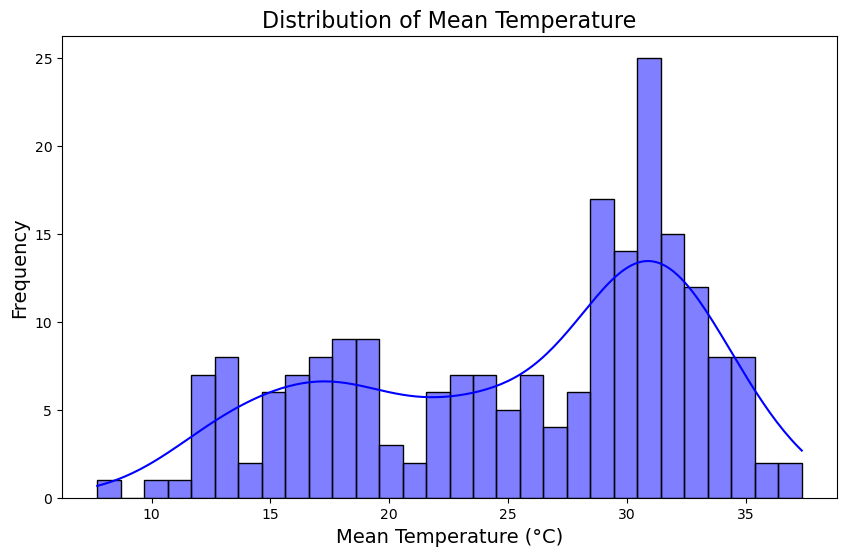

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of 'meantemp' using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(weekly_data_train['meantemp'], kde=True, bins=30, color='blue')

# Add titles and labels
plt.title('Distribution of Mean Temperature', fontsize=16)
plt.xlabel('Mean Temperature (°C)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()


In [10]:
percentile_10_train = np.percentile(weekly_data_train['meantemp'], 10)
percentile_10_test = np.percentile(weekly_data_test['meantemp'], 10)
percentile_10_test

15.382801216291245

In [11]:
percentile_10_train

15.046037437554274

In [12]:
weekly_data_train.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [13]:
weekly_data_test.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [14]:
weekly_data_train.describe()

,meantemp,humidity,wind_speed,meanpressure
count,209.000000,209.000000,209.000000,209.000000
mean,25.483361,60.787632,6.799157,1011.108782
std,7.220111,15.107002,2.809459,68.651741
min,7.705556,22.816497,0.892857,856.704401
25%,18.661054,52.125000,4.733929,1001.553571
50%,28.119898,62.754592,6.826786,1008.930272
75%,31.240476,71.100257,8.791582,1015.145408
max,37.370408,91.982143,13.546488,1962.011139


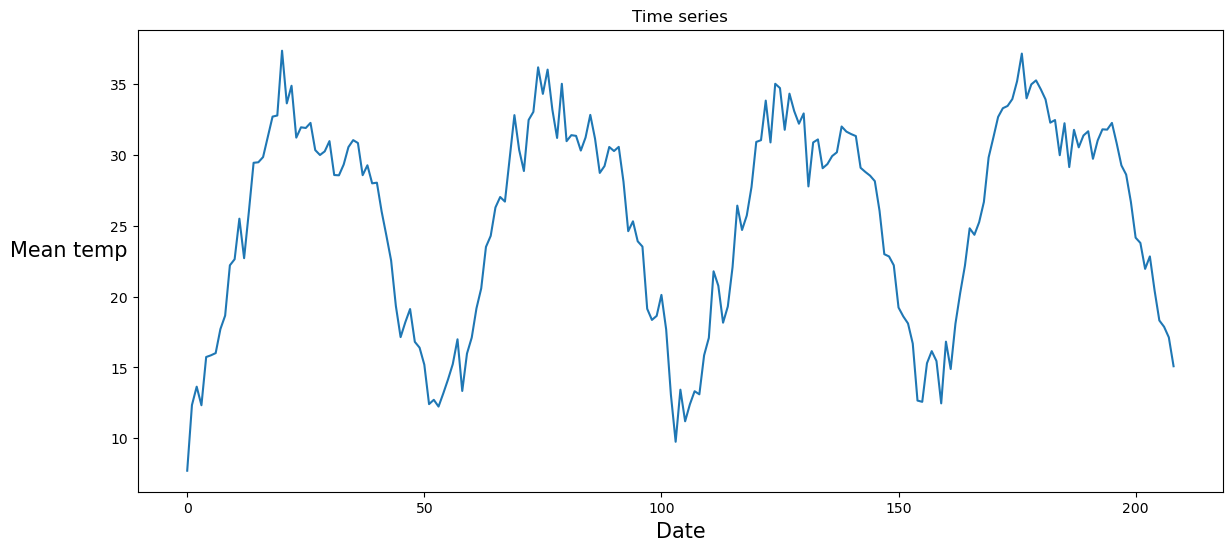

In [15]:
plt.figure(figsize=(14, 6))
plt.title('Time series')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Mean temp', rotation=0, labelpad=30, fontsize=15)
weekly_data_train['meantemp'].plot();

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

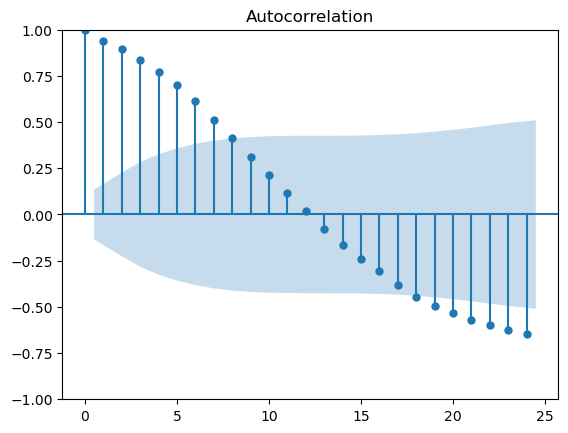

In [17]:
plot_acf(weekly_data_train['meantemp']);

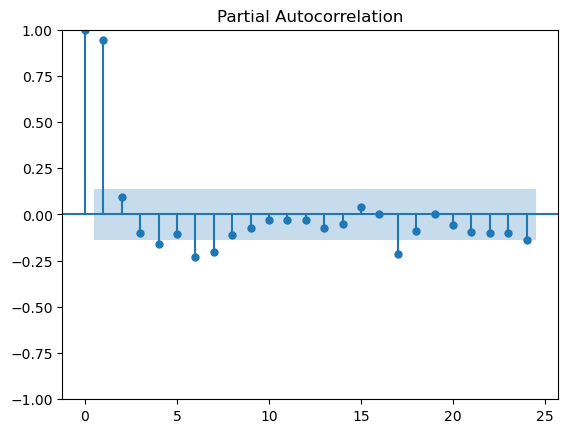

In [18]:
plot_pacf(weekly_data_train['meantemp']);

Stationarity check

In [19]:
from statsmodels.tsa.stattools import acf, adfuller

# Augmented Dickey-Fuller (ADF) Test
result = adfuller(weekly_data_train['meantemp'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -4.745758091420333
p-value: 6.898378388762698e-05


We can say that data is stationary

In [20]:
print('crit value:', result[4])

crit value: {'1%': -3.4631437906252636, '5%': -2.8759570379821047, '10%': -2.574454682874228}


In [21]:
weekly_data_train['meantemp_dif'] = weekly_data_train['meantemp'].diff().dropna()
result = adfuller(weekly_data_train['meantemp_dif'] .dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -2.9872295924883905
p-value: 0.036104328951081816


In [22]:
weekly_data_train

,date,meantemp,humidity,wind_speed,meanpressure,meantemp_dif
0,2013-01-06,7.705556,84.077778,2.337778,1017.300000,NaN
1,2013-01-13,12.343537,65.145238,8.825170,1016.632653,4.637982
2,2013-01-20,13.642857,81.663265,4.242857,1017.139456,1.299320
3,2013-01-27,12.329592,67.748299,4.770544,1020.337075,-1.313265
4,2013-02-03,15.736905,67.667347,2.337194,1017.020578,3.407313
...,...,...,...,...,...,...
204,2016-12-04,20.428841,62.631290,4.839643,873.901783,-2.413306
205,2016-12-11,18.318229,70.672236,3.075850,1015.619483,-2.110612
206,2016-12-18,17.871140,61.808297,5.955406,1016.727185,-0.447089
207,2016-12-25,17.123006,66.346011,9.636147,1014.901237,-0.748134


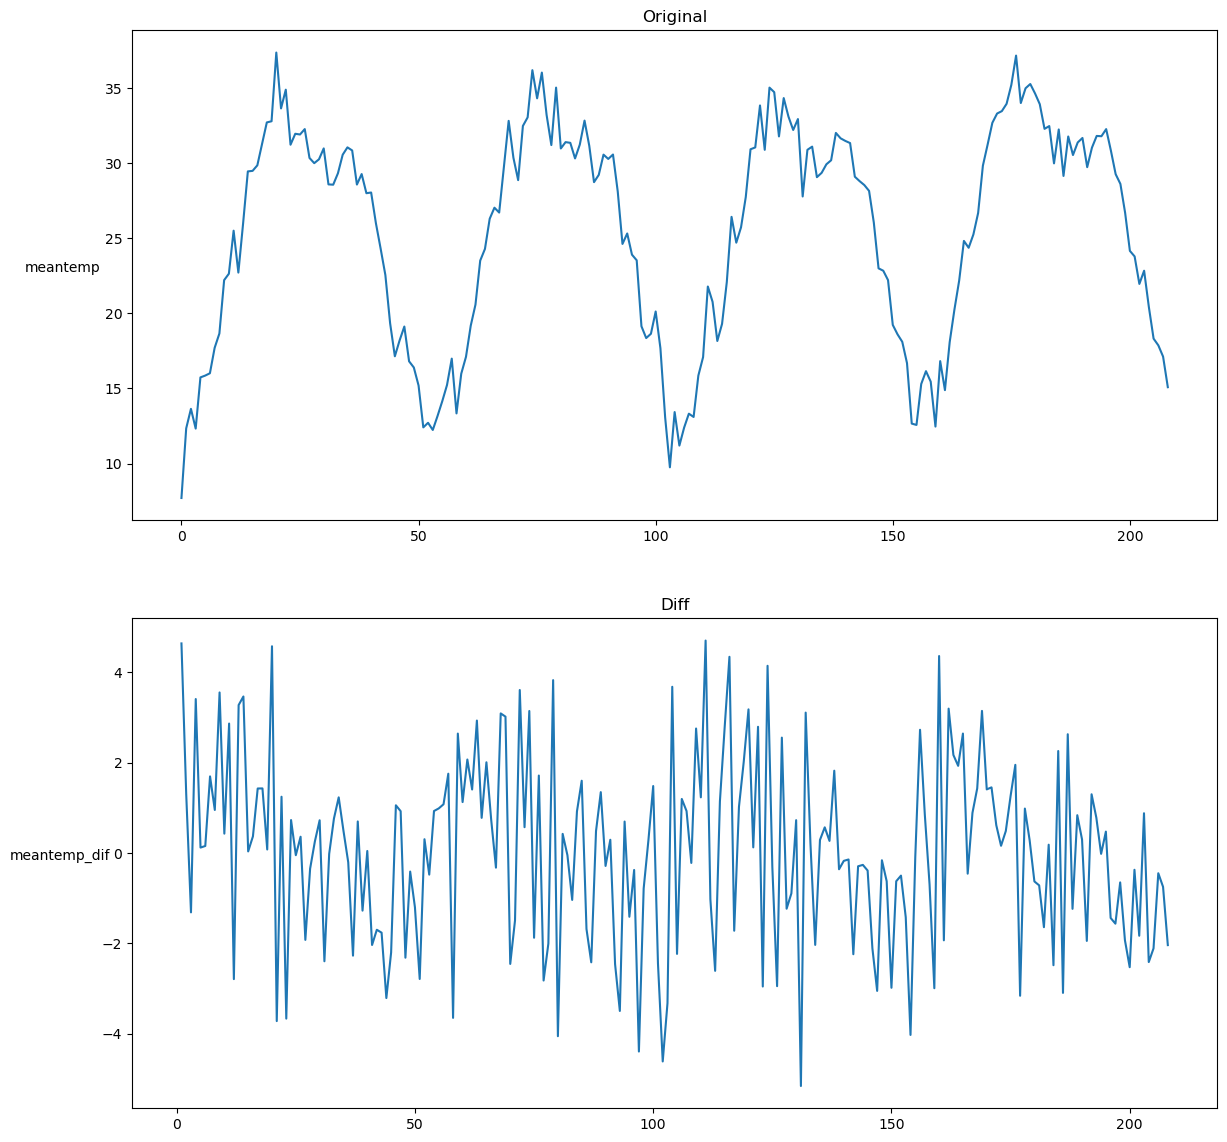

In [23]:
plt.subplots(nrows=2, ncols=1, figsize=(14, 14))

ax = plt.subplot(211)
ax.set_title('Original')
ax.set_ylabel('meantemp', rotation=0, labelpad=30)
weekly_data_train['meantemp'].plot(ax=ax);


ax = plt.subplot(212)
ax.set_title('Diff')
ax.set_ylabel('meantemp_dif', rotation=0, labelpad=30)
weekly_data_train['meantemp_dif'].plot(ax=ax);

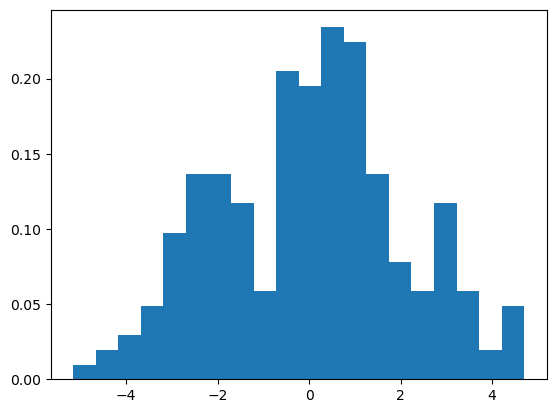

In [24]:
plt.hist(weekly_data_train['meantemp_dif'], density=True, bins=20);

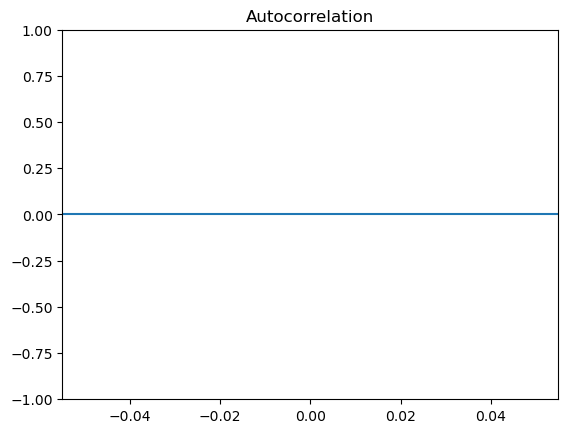

In [25]:
plot_acf(weekly_data_train['meantemp_dif']);

# Model from lib

 Additive regression model:

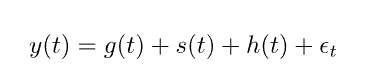

where g(t) describes a piecewise-linear trend (or “growth term”),s(t) describes the various seasonal patterns,h(t) captures the holiday effects, and ε_t is a white noise error term.

Facebook Prophet works in three main stages. First, the pre-processing phase consists of cleaning and preparing the data.

The tool automatically handles missing values, anomalies and outliers. Users can therefore remain focused on understanding the time series, rather than performing these tasks manually.

The modeling then takes into account trend and seasonality to estimate the components associated with each time observation.

Each season can be daily, weekly, monthly, annual or customized according to context. After this estimation, Prophet forecasts for the desired future period.

By defolt it uses Prophet uses a piece-wise linear model, but it can be changed by specifying the model. The piece-wise linear model is fit using the following statistical equations,  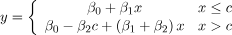

The logistic growth model is fit using the following statistical equation 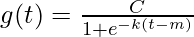 where,

C is the carrying capacity
k is the growth rate
m is an offset parameter

In [33]:
!pip install prophet

In [35]:
from prophet import Prophet

In [36]:
weekly_data_train = weekly_data_train.rename(columns={'date': 'ds', 'meantemp': 'y'})
weekly_data_train.head()

,ds,y,humidity,wind_speed,meanpressure,meantemp_dif
0,2013-01-06,7.705556,84.077778,2.337778,1017.300000,NaN
1,2013-01-13,12.343537,65.145238,8.825170,1016.632653,4.637982
2,2013-01-20,13.642857,81.663265,4.242857,1017.139456,1.299320
3,2013-01-27,12.329592,67.748299,4.770544,1020.337075,-1.313265
4,2013-02-03,15.736905,67.667347,2.337194,1017.020578,3.407313


In [38]:
max(weekly_data_test['date'])-min((weekly_data_test['date']))

Timedelta('119 days 00:00:00')

In [39]:
weekly_data_test = weekly_data_test.rename(columns={'date': 'ds', 'meantemp': 'y'})
weekly_data_test

,ds,y,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-08,17.487247,80.397627,5.061371,1015.048882
2,2017-01-15,13.191727,73.335438,6.806319,1017.212474
3,2017-01-22,14.732486,75.707698,9.368017,1020.516354
4,2017-01-29,17.239193,78.189352,8.815970,1018.575580
5,2017-02-05,16.839757,76.019915,5.264149,1016.297175
6,2017-02-12,15.661508,68.049206,6.182659,1016.573810
7,2017-02-19,19.402628,65.457885,7.274209,1018.125283
8,2017-02-26,19.976190,54.192177,11.535034,1011.868197
9,2017-03-05,21.542125,48.441392,6.725928,1011.937027


In [40]:
# Initialize Prophet model
model_prophet = Prophet()
model_prophet.fit(weekly_data_train)

# Make predictions on the test range
future = pd.DataFrame({'ds': weekly_data_test['ds']})
forecast = model_prophet.predict(future)

# Extract predictions
y_pred_prophet = forecast['yhat'].values
y_test = weekly_data_test['y'].values

# Evaluate Prophet's MAPE
mape_prophet = mean_absolute_percentage_error(y_test, y_pred_prophet)
print(f"MAPE (Prophet Model): {mape_prophet:.2f}")


17:21:00 - cmdstanpy - INFO - Chain [1] start processing
17:21:00 - cmdstanpy - INFO - Chain [1] done processing


MAPE (Prophet Model): 0.09


In [42]:
# Initialize Prophet model
model_prophet = Prophet()
model_prophet.fit(weekly_data_train)

# Make predictions on the test range
future = pd.DataFrame({'ds': weekly_data_test['ds']})
forecast = model_prophet.predict(future)

# Extract predictions
y_pred_prophet = forecast['yhat'].values
y_test = weekly_data_test['y'].values

# Evaluate Prophet's MAPE
mape_prophet = mean_absolute_percentage_error(y_test, y_pred_prophet)
print(f"MAPE (Prophet Model): {mape_prophet:.2f}")

17:21:18 - cmdstanpy - INFO - Chain [1] start processing
17:21:18 - cmdstanpy - INFO - Chain [1] done processing


MAPE (Prophet Model): 0.09


In [44]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,27.672725,12.976896,16.600729,27.672725,27.672725,-12.953101,-12.953101,-12.953101,-12.953101,-12.953101,-12.953101,0.0,0.0,0.0,14.719624
1,2017-01-08,27.702853,13.146494,16.951450,27.702853,27.702853,-12.784705,-12.784705,-12.784705,-12.784705,-12.784705,-12.784705,0.0,0.0,0.0,14.918148
2,2017-01-15,27.732981,13.659068,17.394797,27.732981,27.732981,-12.145317,-12.145317,-12.145317,-12.145317,-12.145317,-12.145317,0.0,0.0,0.0,15.587664
3,2017-01-22,27.763109,14.372411,18.145091,27.762731,27.763516,-11.536396,-11.536396,-11.536396,-11.536396,-11.536396,-11.536396,0.0,0.0,0.0,16.226713
4,2017-01-29,27.793237,14.963257,18.625751,27.792347,27.794311,-10.949101,-10.949101,-10.949101,-10.949101,-10.949101,-10.949101,0.0,0.0,0.0,16.844136
5,2017-02-05,27.823365,15.972545,19.678764,27.821570,27.825405,-10.059833,-10.059833,-10.059833,-10.059833,-10.059833,-10.059833,0.0,0.0,0.0,17.763532
6,2017-02-12,27.853494,17.176690,21.009724,27.850640,27.856787,-8.750969,-8.750969,-8.750969,-8.750969,-8.750969,-8.750969,0.0,0.0,0.0,19.102525
7,2017-02-19,27.883622,18.654451,22.478411,27.879676,27.888036,-7.296676,-7.296676,-7.296676,-7.296676,-7.296676,-7.296676,0.0,0.0,0.0,20.586945
8,2017-02-26,27.913750,19.985727,23.825121,27.908658,27.919465,-6.030510,-6.030510,-6.030510,-6.030510,-6.030510,-6.030510,0.0,0.0,0.0,21.883240
9,2017-03-05,27.943878,21.083794,24.714625,27.937160,27.951199,-4.955354,-4.955354,-4.955354,-4.955354,-4.955354,-4.955354,0.0,0.0,0.0,22.988524


# from scratch

The time column t represents the number of days since the earliest date in the dataset, and it helps the model capture the time-based trend. This will be useful for fitting a trend using linear regression, where t represents time in days.The next step is to separate the seasonality from the overall trend of the data. This is done by applying seasonal decomposition using the statsmodels library.
Seasonal decomposition breaks down a time series into three components:
Trend: The long-term movement in the data.
Seasonal: The repeating short-term fluctuations (e.g., weekly, yearly).
Residual: The remaining noise or randomness after removing the trend and seasonality.
decomposition.seasonal: The extracted seasonal component of the time series.
weekly_data_train['detrended']: The original time series with the seasonal component removed, leaving only the trend and residual.
The trend is modeled using linear regression, where we predict the detrended data as a function of time (t).
The trend is typically assumed to follow a **linear** pattern over time. **Linear regression** is used to estimate this trend by fitting the line that minimizes the sum of squared differences between the observed detrended data and the predicted trend.
The model learns the slope (rate of change) and intercept (starting point) of the trend.

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

# Calculate the 't' column for both train and test sets using the same reference point
weekly_data_train['t'] = (weekly_data_train['ds'] - weekly_data_test['ds'].min()).dt.days
weekly_data_test['t'] = (weekly_data_test['ds'] - weekly_data_test['ds'].min()).dt.days  # Use train's min date

# Detrend the training data using seasonal decomposition
decomposition = seasonal_decompose(weekly_data_train['y'], period=52, model='additive')
weekly_data_train['seasonal'] = decomposition.seasonal
weekly_data_train['detrended'] = weekly_data_train['y'] - weekly_data_train['seasonal']

# Fit a linear regression model for the trend component
X_train = weekly_data_train[['t']]
y_train = weekly_data_train['detrended']
trend_model = LinearRegression()
trend_model.fit(X_train, y_train)

# Predict the trend on the test data
weekly_data_test['seasonal'] = decomposition.seasonal[:len(weekly_data_test)]  # Repeat or truncate seasonal component
weekly_data_test['trend'] = trend_model.predict(weekly_data_test[['t']])  # Use test data 't' column
y_pred_scratch = weekly_data_test['trend'] + weekly_data_test['seasonal']  # Add the seasonal component

# Evaluate the scratch model using MAPE
y_test = weekly_data_test['y']
mape_scratch = mean_absolute_percentage_error(y_test, y_pred_scratch)
print(f"MAPE (Scratch Model): {mape_scratch:.2f}")


MAPE (Scratch Model): 0.07


In [46]:
difference = abs(mape_prophet - mape_scratch)
print(f"Difference in MAPE: {difference:.2f}")
assert difference <= 0.05, "MAPE difference exceeds 5%!"


Difference in MAPE: 0.02


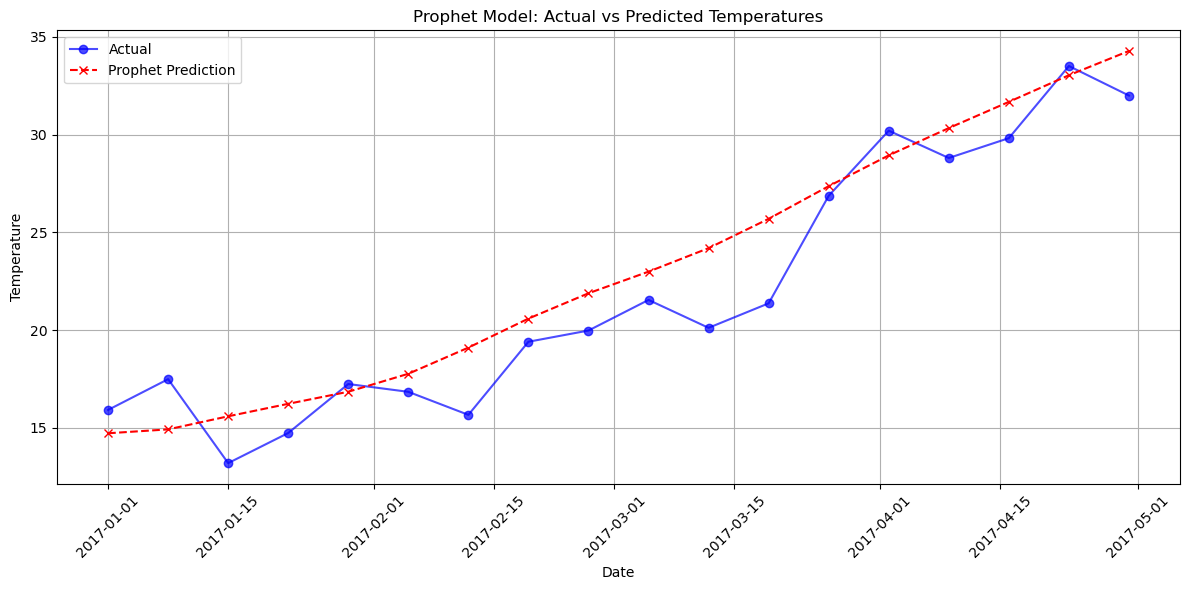

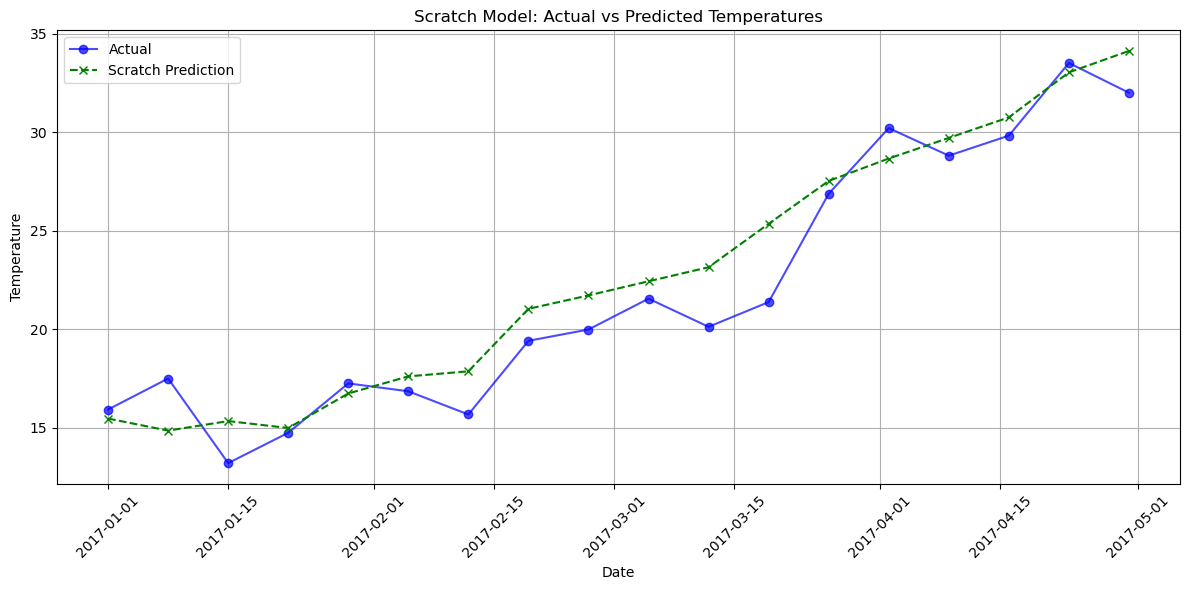

In [47]:
import matplotlib.pyplot as plt

# Plotting Prophet predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(weekly_data_test['ds'], y_test, label='Actual', color='blue', linestyle='-', marker='o', alpha=0.7)
plt.plot(weekly_data_test['ds'], y_pred_prophet, label='Prophet Prediction', color='red', linestyle='--', marker='x')
plt.title('Prophet Model: Actual vs Predicted Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Scratch model predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(weekly_data_test['ds'], y_test, label='Actual', color='blue', linestyle='-', marker='o', alpha=0.7)
plt.plot(weekly_data_test['ds'], y_pred_scratch, label='Scratch Prediction', color='green', linestyle='--', marker='x')
plt.title('Scratch Model: Actual vs Predicted Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Hyperparameters 

## lib model

In [53]:
# Define a reasonable carrying capacity
cap_value = weekly_data_train['y'].max() * 1.2  # Example: 20% higher than max value

# Add 'cap' column
weekly_data_train['cap'] = cap_value
weekly_data_test['cap'] = cap_value


In [54]:
from sklearn.model_selection import RandomizedSearchCV

# Step 1: Define the ProphetWrapper class
class ProphetWrapper:
    def __init__(self, growth='linear', n_changepoints=25, changepoint_range=0.8, seasonality_mode='additive',
                 seasonality_prior_scale=10.0, changepoint_prior_scale=0.05, interval_width=0.8):
        self.growth = growth
        self.n_changepoints = n_changepoints
        self.changepoint_range = changepoint_range
        self.seasonality_mode = seasonality_mode
        self.seasonality_prior_scale = seasonality_prior_scale
        self.changepoint_prior_scale = changepoint_prior_scale
        self.interval_width = interval_width
        self.model = None

    def fit(self, X, y=None):
        if self.growth == 'logistic' and 'cap' not in X.columns:
            raise ValueError("Capacities must be supplied for logistic growth in column 'cap'")
        
        self.model = Prophet(
            growth=self.growth,
            n_changepoints=self.n_changepoints,
            changepoint_range=self.changepoint_range,
            seasonality_mode=self.seasonality_mode,
            seasonality_prior_scale=self.seasonality_prior_scale,
            changepoint_prior_scale=self.changepoint_prior_scale,
            interval_width=self.interval_width,
        )
        self.model.fit(X)
        return self

    def predict(self, X):
        forecast = self.model.predict(X)
        return forecast['yhat'].values

    def get_params(self, deep=True):
        return {
            'growth': self.growth,
            'n_changepoints': self.n_changepoints,
            'changepoint_range': self.changepoint_range,
            'seasonality_mode': self.seasonality_mode,
            'seasonality_prior_scale': self.seasonality_prior_scale,
            'changepoint_prior_scale': self.changepoint_prior_scale,
            'interval_width': self.interval_width,
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self


# Step 2: Load training and testing data
# Assume weekly_data_train and weekly_data_test are provided

X_train = weekly_data_train[['ds', 'y', 'cap']]
X_test = weekly_data_test[['ds', 'cap']]
y_test = weekly_data_test['y']

# Step 3: Define parameter search space
param_space_prophet = {
    'growth': ['linear', 'logistic'],
    'n_changepoints': range(0, 50, 10),
    'changepoint_range': np.linspace(0.5, 1.0, 10),
    'seasonality_mode': ['additive', 'multiplicative'],
    'seasonality_prior_scale': np.linspace(5.0, 15.0, 10),
    'changepoint_prior_scale': np.linspace(0.01, 0.1, 10),
    'interval_width': np.linspace(0.2, 0.8, 10),
}

# Step 4: Use RandomizedSearchCV
prophet_wrapper = ProphetWrapper()
search = RandomizedSearchCV(
    estimator=prophet_wrapper,
    param_distributions=param_space_prophet,
    n_iter=50,
    scoring='neg_mean_absolute_percentage_error',  # Use MAPE scoring
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
search.fit(X_train)

# Step 5: Evaluate the best model
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Log results
print(f"Best Parameters: {search.best_params_}")
print(f"Mean Absolute Percentage Error (MAPE) on Test Data: {mape:.2f}")

# Step 6: Log MAPE for all parameter combinations
results_df = pd.DataFrame(search.cv_results_)
results_df['mape'] = -results_df['mean_test_score']  # Convert negative scores to positive
#print("MAPE for all parameter combinations:")
#print(results_df[['params', 'mape']])


Fitting 3 folds for each of 50 candidates, totalling 150 fits


17:31:08 - cmdstanpy - INFO - Chain [1] start processing
17:31:09 - cmdstanpy - INFO - Chain [1] done processing


Best Parameters: {'seasonality_prior_scale': 13.88888888888889, 'seasonality_mode': 'multiplicative', 'n_changepoints': 20, 'interval_width': 0.8, 'growth': 'logistic', 'changepoint_range': 0.5, 'changepoint_prior_scale': 0.07}
Mean Absolute Percentage Error (MAPE) on Test Data: 0.07


Best Parameters: {'seasonality_prior_scale': 13.88888888888889, 'seasonality_mode': 'multiplicative', 'n_changepoints': 20, 'interval_width': 0.8, 'growth': 'logistic', 'changepoint_range': 0.5, 'changepoint_prior_scale': 0.07}
Mean Absolute Percentage Error (MAPE) on Test Data: 7.81%


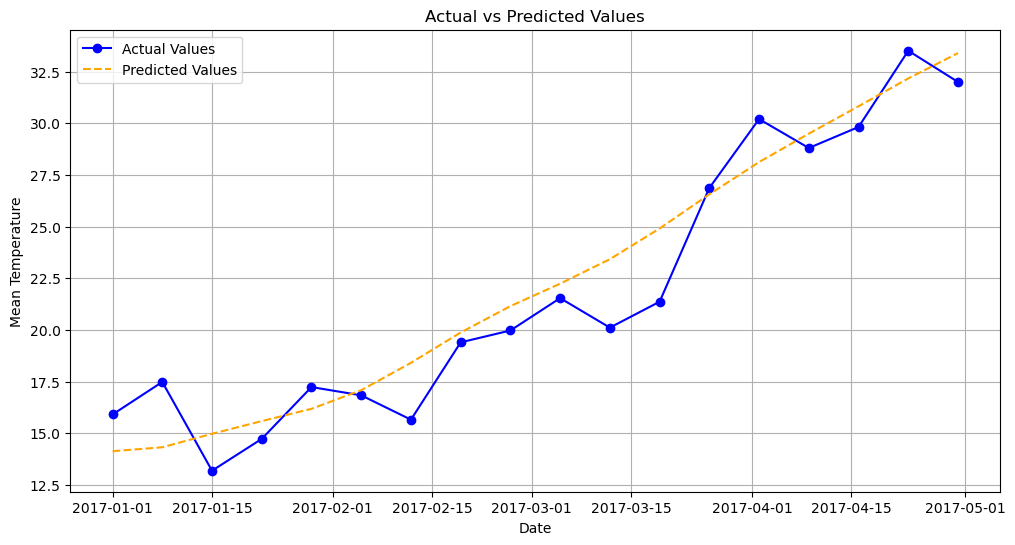

In [56]:
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Step 5: Evaluate the best model using MAPE
best_model = prophet_search.best_estimator_

# Prepare the forecast DataFrame
forecast_df = weekly_data_test[['ds', 'cap']].copy()  # Include 'cap' for logistic growth
forecast_df['yhat'] = best_model.predict(forecast_df)

# Calculate MAPE
actuals = weekly_data_test['y'].values
predictions = forecast_df['yhat'].values

# Avoid division by zero for MAPE
actuals = np.where(actuals == 0, np.finfo(float).eps, actuals)
mape = mean_absolute_percentage_error(actuals, predictions) * 100  # Convert to percentage

# Print Results
print(f"Best Parameters: {search.best_params_}")
print(f"Mean Absolute Percentage Error (MAPE) on Test Data: {mape:.2f}%")

# Step 6: Visualization
plt.figure(figsize=(12, 6))
plt.plot(weekly_data_test['ds'], actuals, label="Actual Values", color="blue", marker="o")
plt.plot(weekly_data_test['ds'], predictions, label="Predicted Values", color="orange", linestyle="--")
plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.grid()
plt.show()


In [57]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import RandomizedSearchCV
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import ParameterGrid

# Function to calculate MAPE
def calculate_mape(y_true, y_pred):
    return mean_absolute_percentage_error(y_true, y_pred)

# Function to train and test model from scratch
def train_and_evaluate_model(period, changepoint_range, seasonal_model_type, changepoint_prior_scale, interval_width, weekly_data_train, weekly_data_test):
    # Calculate the 't' column for both train and test sets using the same reference point
    weekly_data_train['t'] = (weekly_data_train['ds'] - weekly_data_test['ds'].min()).dt.days
    weekly_data_test['t'] = (weekly_data_test['ds'] - weekly_data_test['ds'].min()).dt.days  # Use train's min date

    # Detrend the training data using seasonal decomposition
    decomposition = seasonal_decompose(weekly_data_train['y'], period=period, model=seasonal_model_type)
    weekly_data_train['seasonal'] = decomposition.seasonal
    weekly_data_train['detrended'] = weekly_data_train['y'] - weekly_data_train['seasonal']

    # Fit a linear regression model for the trend component
    X_train = weekly_data_train[['t']]
    y_train = weekly_data_train['detrended']
    trend_model = LinearRegression()
    trend_model.fit(X_train, y_train)

    # Predict the trend on the test data
    weekly_data_test['seasonal'] = decomposition.seasonal[:len(weekly_data_test)]  # Repeat or truncate seasonal component
    weekly_data_test['trend'] = trend_model.predict(weekly_data_test[['t']])  # Use test data 't' column
    y_pred_scratch = weekly_data_test['trend'] + weekly_data_test['seasonal']  # Add the seasonal component

    # Evaluate the model using MAPE
    y_test = weekly_data_test['y']
    mape_scratch = calculate_mape(y_test, y_pred_scratch)
    
    return mape_scratch

# Hyperparameter space
param_space = {
    'period': [52, 12],  # Common periods: weekly (52), yearly (365), monthly (12)
    'changepoint_range': np.linspace(0.5, 1.0, 5),  # Percentage of data to consider for changepoints
    'seasonal_model_type': ['additive', 'multiplicative'],  # Seasonal model types
    'changepoint_prior_scale': np.linspace(0.01, 0.1, 5),  # Regularization for trend changepoints
    'interval_width': np.linspace(0.2, 0.8, 5)  # Confidence interval width for predictions
}

# Create randomized search over the hyperparameter space


best_mape = float('inf')
best_params = None

# Grid search over the parameter space
for params in ParameterGrid(param_space):
    print(f"Evaluating params: {params}")
    
    # Evaluate the model with current hyperparameters
    mape = train_and_evaluate_model(
        period=params['period'],
        changepoint_range=params['changepoint_range'],
        seasonal_model_type=params['seasonal_model_type'],
        changepoint_prior_scale=params['changepoint_prior_scale'],
        interval_width=params['interval_width'],
        weekly_data_train=weekly_data_train,
        weekly_data_test=weekly_data_test
    )
    
    # Track the best hyperparameters based on MAPE
    if mape < best_mape:
        best_mape = mape
        best_params = params

# Output best parameters and MAPE
print(f"Best Hyperparameters: {best_params}")
print(f"Best MAPE: {best_mape:.2f}")

# Now, with the best hyperparameters, visualize the results (optional)
import matplotlib.pyplot as plt

# Re-train the model with the best hyperparameters
best_mape_model = train_and_evaluate_model(
    period=best_params['period'],
    changepoint_range=best_params['changepoint_range'],
    seasonal_model_type=best_params['seasonal_model_type'],
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    interval_width=best_params['interval_width'],
    weekly_data_train=weekly_data_train,
    weekly_data_test=weekly_data_test
)




Evaluating params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.5, 'interval_width': 0.2, 'period': 52, 'seasonal_model_type': 'additive'}
Evaluating params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.5, 'interval_width': 0.2, 'period': 52, 'seasonal_model_type': 'multiplicative'}
Evaluating params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.5, 'interval_width': 0.2, 'period': 12, 'seasonal_model_type': 'additive'}
Evaluating params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.5, 'interval_width': 0.2, 'period': 12, 'seasonal_model_type': 'multiplicative'}
Evaluating params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.5, 'interval_width': 0.35000000000000003, 'period': 52, 'seasonal_model_type': 'additive'}
Evaluating params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.5, 'interval_width': 0.35000000000000003, 'period': 52, 'seasonal_model_type': 'multiplicative'}
Evaluating params: {'changepoint_prior_scale

Evaluating params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.75, 'interval_width': 0.8, 'period': 52, 'seasonal_model_type': 'multiplicative'}
Evaluating params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.75, 'interval_width': 0.8, 'period': 12, 'seasonal_model_type': 'additive'}
Evaluating params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.75, 'interval_width': 0.8, 'period': 12, 'seasonal_model_type': 'multiplicative'}
Evaluating params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.875, 'interval_width': 0.2, 'period': 52, 'seasonal_model_type': 'additive'}
Evaluating params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.875, 'interval_width': 0.2, 'period': 52, 'seasonal_model_type': 'multiplicative'}
Evaluating params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.875, 'interval_width': 0.2, 'period': 12, 'seasonal_model_type': 'additive'}
Evaluating params: {'changepoint_prior_scale': 0.01, 'changepoint_r

Evaluating params: {'changepoint_prior_scale': 0.0325, 'changepoint_range': 0.5, 'interval_width': 0.6500000000000001, 'period': 12, 'seasonal_model_type': 'multiplicative'}
Evaluating params: {'changepoint_prior_scale': 0.0325, 'changepoint_range': 0.5, 'interval_width': 0.8, 'period': 52, 'seasonal_model_type': 'additive'}
Evaluating params: {'changepoint_prior_scale': 0.0325, 'changepoint_range': 0.5, 'interval_width': 0.8, 'period': 52, 'seasonal_model_type': 'multiplicative'}
Evaluating params: {'changepoint_prior_scale': 0.0325, 'changepoint_range': 0.5, 'interval_width': 0.8, 'period': 12, 'seasonal_model_type': 'additive'}
Evaluating params: {'changepoint_prior_scale': 0.0325, 'changepoint_range': 0.5, 'interval_width': 0.8, 'period': 12, 'seasonal_model_type': 'multiplicative'}
Evaluating params: {'changepoint_prior_scale': 0.0325, 'changepoint_range': 0.625, 'interval_width': 0.2, 'period': 52, 'seasonal_model_type': 'additive'}
Evaluating params: {'changepoint_prior_scale': 

Evaluating params: {'changepoint_prior_scale': 0.0325, 'changepoint_range': 0.875, 'interval_width': 0.8, 'period': 12, 'seasonal_model_type': 'multiplicative'}
Evaluating params: {'changepoint_prior_scale': 0.0325, 'changepoint_range': 1.0, 'interval_width': 0.2, 'period': 52, 'seasonal_model_type': 'additive'}
Evaluating params: {'changepoint_prior_scale': 0.0325, 'changepoint_range': 1.0, 'interval_width': 0.2, 'period': 52, 'seasonal_model_type': 'multiplicative'}
Evaluating params: {'changepoint_prior_scale': 0.0325, 'changepoint_range': 1.0, 'interval_width': 0.2, 'period': 12, 'seasonal_model_type': 'additive'}
Evaluating params: {'changepoint_prior_scale': 0.0325, 'changepoint_range': 1.0, 'interval_width': 0.2, 'period': 12, 'seasonal_model_type': 'multiplicative'}
Evaluating params: {'changepoint_prior_scale': 0.0325, 'changepoint_range': 1.0, 'interval_width': 0.35000000000000003, 'period': 52, 'seasonal_model_type': 'additive'}
Evaluating params: {'changepoint_prior_scale':

Evaluating params: {'changepoint_prior_scale': 0.05500000000000001, 'changepoint_range': 0.625, 'interval_width': 0.8, 'period': 52, 'seasonal_model_type': 'multiplicative'}
Evaluating params: {'changepoint_prior_scale': 0.05500000000000001, 'changepoint_range': 0.625, 'interval_width': 0.8, 'period': 12, 'seasonal_model_type': 'additive'}
Evaluating params: {'changepoint_prior_scale': 0.05500000000000001, 'changepoint_range': 0.625, 'interval_width': 0.8, 'period': 12, 'seasonal_model_type': 'multiplicative'}
Evaluating params: {'changepoint_prior_scale': 0.05500000000000001, 'changepoint_range': 0.75, 'interval_width': 0.2, 'period': 52, 'seasonal_model_type': 'additive'}
Evaluating params: {'changepoint_prior_scale': 0.05500000000000001, 'changepoint_range': 0.75, 'interval_width': 0.2, 'period': 52, 'seasonal_model_type': 'multiplicative'}
Evaluating params: {'changepoint_prior_scale': 0.05500000000000001, 'changepoint_range': 0.75, 'interval_width': 0.2, 'period': 12, 'seasonal_mo

Evaluating params: {'changepoint_prior_scale': 0.05500000000000001, 'changepoint_range': 1.0, 'interval_width': 0.6500000000000001, 'period': 12, 'seasonal_model_type': 'additive'}
Evaluating params: {'changepoint_prior_scale': 0.05500000000000001, 'changepoint_range': 1.0, 'interval_width': 0.6500000000000001, 'period': 12, 'seasonal_model_type': 'multiplicative'}
Evaluating params: {'changepoint_prior_scale': 0.05500000000000001, 'changepoint_range': 1.0, 'interval_width': 0.8, 'period': 52, 'seasonal_model_type': 'additive'}
Evaluating params: {'changepoint_prior_scale': 0.05500000000000001, 'changepoint_range': 1.0, 'interval_width': 0.8, 'period': 52, 'seasonal_model_type': 'multiplicative'}
Evaluating params: {'changepoint_prior_scale': 0.05500000000000001, 'changepoint_range': 1.0, 'interval_width': 0.8, 'period': 12, 'seasonal_model_type': 'additive'}
Evaluating params: {'changepoint_prior_scale': 0.05500000000000001, 'changepoint_range': 1.0, 'interval_width': 0.8, 'period': 1

Evaluating params: {'changepoint_prior_scale': 0.0775, 'changepoint_range': 0.75, 'interval_width': 0.6500000000000001, 'period': 12, 'seasonal_model_type': 'multiplicative'}
Evaluating params: {'changepoint_prior_scale': 0.0775, 'changepoint_range': 0.75, 'interval_width': 0.8, 'period': 52, 'seasonal_model_type': 'additive'}
Evaluating params: {'changepoint_prior_scale': 0.0775, 'changepoint_range': 0.75, 'interval_width': 0.8, 'period': 52, 'seasonal_model_type': 'multiplicative'}
Evaluating params: {'changepoint_prior_scale': 0.0775, 'changepoint_range': 0.75, 'interval_width': 0.8, 'period': 12, 'seasonal_model_type': 'additive'}
Evaluating params: {'changepoint_prior_scale': 0.0775, 'changepoint_range': 0.75, 'interval_width': 0.8, 'period': 12, 'seasonal_model_type': 'multiplicative'}
Evaluating params: {'changepoint_prior_scale': 0.0775, 'changepoint_range': 0.875, 'interval_width': 0.2, 'period': 52, 'seasonal_model_type': 'additive'}
Evaluating params: {'changepoint_prior_sca

Evaluating params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.625, 'interval_width': 0.2, 'period': 52, 'seasonal_model_type': 'additive'}
Evaluating params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.625, 'interval_width': 0.2, 'period': 52, 'seasonal_model_type': 'multiplicative'}
Evaluating params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.625, 'interval_width': 0.2, 'period': 12, 'seasonal_model_type': 'additive'}
Evaluating params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.625, 'interval_width': 0.2, 'period': 12, 'seasonal_model_type': 'multiplicative'}
Evaluating params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.625, 'interval_width': 0.35000000000000003, 'period': 52, 'seasonal_model_type': 'additive'}
Evaluating params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.625, 'interval_width': 0.35000000000000003, 'period': 52, 'seasonal_model_type': 'multiplicative'}
Evaluating params: {'changepoint_prior

Evaluating params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 1.0, 'interval_width': 0.35000000000000003, 'period': 52, 'seasonal_model_type': 'additive'}
Evaluating params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 1.0, 'interval_width': 0.35000000000000003, 'period': 52, 'seasonal_model_type': 'multiplicative'}
Evaluating params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 1.0, 'interval_width': 0.35000000000000003, 'period': 12, 'seasonal_model_type': 'additive'}
Evaluating params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 1.0, 'interval_width': 0.35000000000000003, 'period': 12, 'seasonal_model_type': 'multiplicative'}
Evaluating params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 1.0, 'interval_width': 0.5, 'period': 52, 'seasonal_model_type': 'additive'}
Evaluating params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 1.0, 'interval_width': 0.5, 'period': 52, 'seasonal_model_type': 'multiplicative'}
Evaluating params:

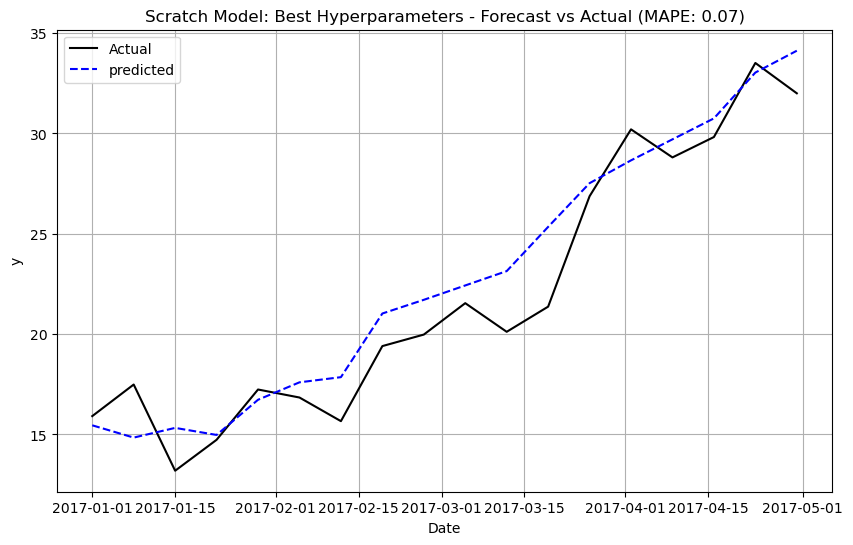

In [59]:
# Plot the predictions and actual data for visual comparison
plt.figure(figsize=(10, 6))
plt.plot(weekly_data_test['ds'], weekly_data_test['y'], label="Actual", color='black')
plt.plot(weekly_data_test['ds'], weekly_data_test['trend'] + weekly_data_test['seasonal'], label="predicted", color='blue', linestyle='--')
plt.xlabel("Date")
plt.ylabel("y")
plt.title(f"Scratch Model: Best Hyperparameters - Forecast vs Actual (MAPE: {best_mape:.2f})")
plt.legend()
plt.grid(True)
plt.show()